In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
churn=pd.read_csv('Churn_Modelling.csv')

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


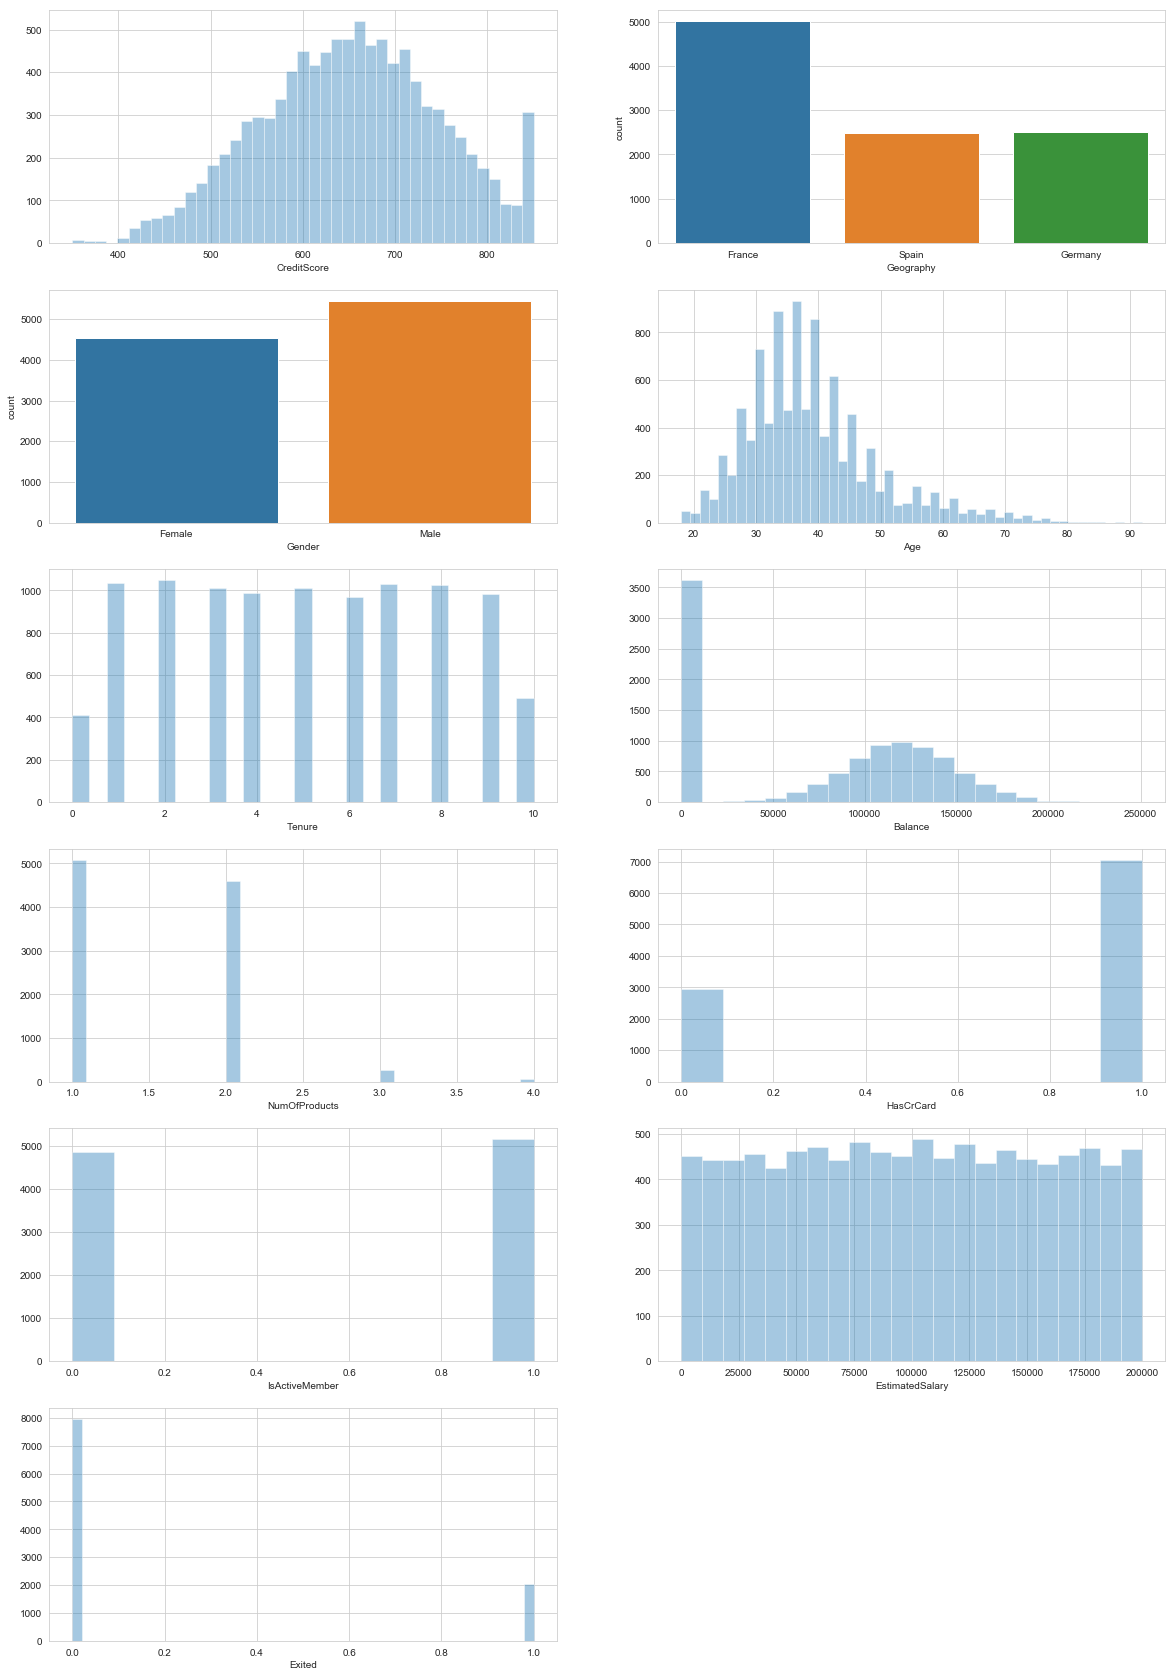

In [5]:
plt.figure(figsize=(20,30))
def plot_cols():
    for i,j in enumerate(churn.columns[3:]):
        plt.subplot(6,2,i+1)
        if(churn[j].dtypes==object):
            sns.countplot(churn[j])
        else:
            sns.distplot(churn[j],kde=False)
plot_cols()


In [6]:
churn.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
y=churn['Exited']
X=churn.drop('Exited',axis=1)

In [8]:
X=pd.get_dummies(data=X,columns=['Geography','Gender'],prefix_sep='_',drop_first=True)

In [9]:
X=X.iloc[:,3:]

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
X[cols]=scaler.fit_transform(X[cols])

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,0,0,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,0,0,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,1,0


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [14]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1413
Before OverSampling, counts of label '0': 5587 



Using TensorFlow backend.
/Users/shekheee/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shekheee/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shekheee/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shekheee/anaconda3/lib/python3.6/site-pa

After OverSampling, the shape of train_X: (11174, 11)
After OverSampling, the shape of train_y: (11174,) 

After OverSampling, counts of label '1': 5587
After OverSampling, counts of label '0': 5587


In [15]:
import statsmodels.api as sm
log_model=sm.GLM(y_train_res,sm.add_constant(X_train_res),family=sm.families.Binomial()).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                11174
Model:                            GLM   Df Residuals:                    11162
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6047.8
Date:                Sun, 31 May 2020   Deviance:                       12096.
Time:                        01:42:01   Pearson chi2:                 1.15e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.8365      0.053     15.699      0.000       0.732       0.941
CreditScore          -0.0842      0.023     -3.718      0.000      -0.129      -0.040
Age                   0.9091      0.026     35.400      0.000       0.859       0.959
Tenure               -0.0742      0.022     -3.310      0.001      -0.118      -0.030
Balance               0.1740      0.025      6.933      0.000       0.125       0.223
NumOfProducts        -0.0971      0.020     -4.957      0.000      -0.136      -0.059
HasCrCard            -0.2501      0.048     -5.234      0.000      -0.344      -0.156
IsActiveMember       -1.3872      0.047    -29.692      0.000      -1.479      -1.296
EstimatedSalary       0.0528      0.023      2.304      0.021       0.008       0.098
Geography_Germany     0.5506      0.056      9.879      0.000       0.441       0.660
Geography_Spain      -0.4880      0.059     -8.253      0.000      -0.604      -0.372
Gender_Male          -0.8140      0.045    -18.172      0.000      -0.902      -0.726
=====================================================================================
"""

In [16]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,HasCrCard,2.16
10,Gender_Male,1.82
6,IsActiveMember,1.73
8,Geography_Germany,1.60
9,Geography_Spain,1.34
3,Balance,1.32
4,NumOfProducts,1.12
1,Age,1.01
0,CreditScore,1.00
2,Tenure,1.00


In [17]:
# X_train.drop('HasCrCard',axis=1,inplace=True)

# log_model2=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial()).fit()
# log_model2.summary()

In [18]:
# X_train.drop('Geography_Spain',axis=1,inplace=True)

# log_model3=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial()).fit()
# log_model3.summary()

In [19]:
# # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = pd.DataFrame()
# vif['Features'] = X_train.columns
# vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [21]:
X_train_predict=log_model.predict()

In [22]:
X_train_predict

array([0.18187383, 0.37336275, 0.35058462, ..., 0.6514047 , 0.90286663,
       0.76257624])

In [24]:
pred_table=pd.DataFrame({'Churn':y_train_res,'Churn_pred_prob':X_train_predict})

In [25]:
pred_table['Churn_pred']=pred_table['Churn_pred_prob'].apply(lambda x: 1 if x>0.5 else 0)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [31]:
cm=confusion_matrix(pred_table['Churn'],pred_table['Churn_pred'])
cr=classification_report(pred_table['Churn'],pred_table['Churn_pred'])

In [28]:
Accuracy=(cm[0,0]+cm[1,1])/len(X_train)
Sensitivity=(cm[1,1]+cm[1,1])/len(X_train)

In [29]:
cm

array([[4039, 1548],
       [1491, 4096]])

In [33]:
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      5587
           1       0.73      0.73      0.73      5587

    accuracy                           0.73     11174
   macro avg       0.73      0.73      0.73     11174
weighted avg       0.73      0.73      0.73     11174



In [ ]:
pred_table['Churn_pred']=pred_table['Churn_pred_prob'].apply(lambda x: 1 if x>0.1 else 0)
confusion=confusion_matrix(pred_table['Churn'],pred_table['Churn_pred'])
confusion

In [ ]:
y_train.value_counts()

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [42]:
col=pd.DataFrame(columns=['Threshhold','Sensitivity','Specificity','Accuracy'])
for i in range(0,11):
    pred_table['Churn_pred']=pred_table['Churn_pred_prob'].apply(lambda x: 1 if x>(i/10) else 0)
    confusion=confusion_matrix(pred_table['Churn'],pred_table['Churn_pred'])

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    sens=TP / float(TP+FN)

    spec=TN / float(TN+FP)

    acc=(TP+TN)/float(TP+TN+FP+FN)
    t=i/10

    col=col.append({'Threshhold':t,'Sensitivity':sens ,'Specificity':spec,'Accuracy':acc},ignore_index=True)

col

,Threshhold,Sensitivity,Specificity,Accuracy
0,0.0,1.000000,0.000000,0.500000
1,0.1,0.993556,0.109003,0.551280
2,0.2,0.964382,0.303025,0.633703
3,0.3,0.906927,0.458565,0.682746
4,0.4,0.827636,0.607661,0.717648
5,0.5,0.733130,0.722928,0.728029
6,0.6,0.613030,0.825667,0.719348
7,0.7,0.454627,0.899946,0.677287
8,0.8,0.282262,0.953284,0.617773
9,0.9,0.094147,0.990335,0.542241


# 

In [ ]:
X_train_predict=log_model3.predict()

In [ ]:
X_train_predict=pd.DataFrame(X_train_predict)

In [ ]:
X_train_predict.isna().sum()

In [39]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [40]:
import sklearn.metrics as metrics

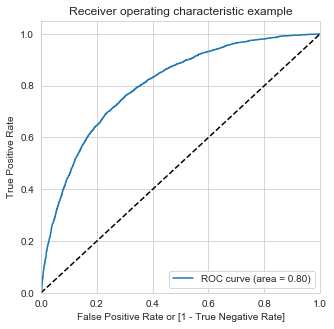

In [44]:
draw_roc(pred_table['Churn'],pred_table['Churn_pred_prob'])

In [43]:
pred_table['Churn'],pred_table['Churn_pred']

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 11169    1
 11170    1
 11171    1
 11172    1
 11173    1
 Name: Churn, Length: 11174, dtype: int64, 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 11169    0
 11170    0
 11171    0
 11172    0
 11173    0
 Name: Churn_pred, Length: 11174, dtype: int64)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))